###### Flower Data Set is not divided into proper folder structure. Hence, we download the dataset in our local machine-> maps working directory to dataset folder->Devide the dataset into 3 folders- Train, Validation, and Test. Inside train and validation folder we create 17 folders, each containing specific flower category images.

In [1]:
#Set current working directory
import os
os.chdir('/Users/urvashijaitley/Desktop/ass2')
print(os.getcwd())

/Users/urvashijaitley/Desktop/ass2


In [ ]:
#Create folder structure. Divided 80%-15%-5% data into train, validation and test respectively.

import shutil
import os

#Each flower category have 80 images

for i in range (1,18):
    j = 80 * (i-1) + 1;
    print ("i = " + str(i) +  " j = " + str(j))
    os.mkdir('/Users/urvashijaitley/Desktop/ass2/test/%d'%(i))
    os.mkdir('/Users/urvashijaitley/Desktop/ass2/train/%d'%(i))
    os.mkdir('/Users/urvashijaitley/Desktop/ass2/valid/%d'%(i))
    
    for k in range(j,j+65):
        source = '/Users/urvashijaitley/Desktop/jpg/image_%04d.jpg'%(k)
        destination = '/Users/urvashijaitley/Desktop/ass2/train/%d/'%(i)
        shutil.copy2(source,destination)
      
    for k in range(j+65,j+77):
        
        source = '/Users/urvashijaitley/Desktop/jpg/image_%04d.jpg'%(k)
        destination = '/Users/urvashijaitley/Desktop/ass2/valid/%d/'%(i)
        shutil.copy2(source,destination)
       
    for k in range(j+77,j+81):
        
        source = '/Users/urvashijaitley/Desktop/jpg/image_%04d.jpg'%(k)
        destination = '/Users/urvashijaitley/Desktop/ass2/test/%d/'%(i)
        shutil.copy2(source,destination)

In [2]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
vgg_conv.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
train_dir = './train'
validation_dir = './valid'

nTrain = 1105
nVal = 204

In [11]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print(tf.__version__)
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

#Re
datagen = ImageDataGenerator(rescale=1./255, featurewise_std_normalization=True)
batch_size = 20

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,17))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break
        
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

1.1.0
Found 1105 images belonging to 17 classes.


/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:988: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:996: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [12]:
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,17))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,   
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

Found 204 images belonging to 17 classes.


/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:988: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:996: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [13]:
#Creating custom Densed Layer- Model 1

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation= tf.nn.softmax))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1105 samples, validate on 204 samples
Epoch 1/30
1105/1105 [==============================] - 12s 11ms/step - loss: 2.3015 - acc: 0.3738 - val_loss: 1.7224 - val_acc: 0.4902
Epoch 2/30
1105/1105 [==============================] - 11s 10ms/step - loss: 0.9326 - acc: 0.7167 - val_loss: 1.3034 - val_acc: 0.6078
Epoch 3/30
1105/1105 [==============================] - 12s 11ms/step - loss: 0.5286 - acc: 0.8416 - val_loss: 1.3100 - val_acc: 0.6176
Epoch 4/30
1105/1105 [==============================] - 11s 10ms/step - loss: 0.3254 - acc: 0.9023 - val_loss: 1.4014 - val_acc: 0.6176
Epoch 5/30
1105/1105 [==============================] - 11s 10ms/step - loss: 0.2146 - acc: 0.9376 - val_loss: 1.4630 - val_acc: 0.5588
Epoch 6/30
1105/1105 [==============================] - 12s 11ms/step - loss: 0.1551 - acc: 0.9538 - val_loss: 2.0707 - val_acc: 0.4804
Epoch 7/30
1105/1105 [==============================] - 12s 11ms/step - loss: 0.1177 - acc: 0.9629 - val_loss: 1.2123 - val_acc: 0.6520
E

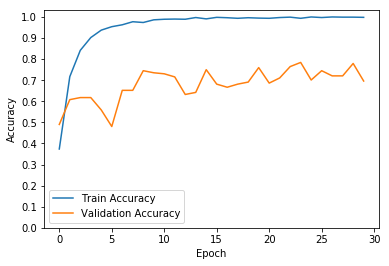

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Validation Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

###### In above model, there is a huge difference between Train and Validation accuracy and loss. Validation accuracy is approx 70% from the above model, while train accuracy is 99%. This might be the case of overfitting.  Below we are trying to build a model with different set of dense layer hyperparameters to overcome the problem of overfitting and  increase the validation accuracy.

In [57]:
#Dense Layer model 2
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.1),activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation= tf.nn.softmax))

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1105 samples, validate on 204 samples
Epoch 1/30
1105/1105 [==============================] - 26s 24ms/step - loss: 13.4803 - acc: 0.1086 - val_loss: 4.6020 - val_acc: 0.0882
Epoch 2/30
1105/1105 [==============================] - 25s 23ms/step - loss: 3.8093 - acc: 0.2208 - val_loss: 4.6909 - val_acc: 0.0735
Epoch 3/30
1105/1105 [==============================] - 27s 25ms/step - loss: 3.3537 - acc: 0.2968 - val_loss: 3.3786 - val_acc: 0.2402
Epoch 4/30
1105/1105 [==============================] - 25s 23ms/step - loss: 3.0973 - acc: 0.3611 - val_loss: 3.5620 - val_acc: 0.2892
Epoch 5/30
1105/1105 [==============================] - 25s 23ms/step - loss: 2.9225 - acc: 0.4072 - val_loss: 2.9199 - val_acc: 0.3382
Epoch 6/30
1105/1105 [==============================] - 27s 25ms/step - loss: 2.6710 - acc: 0.4778 - val_loss: 5.0976 - val_acc: 0.2108
Epoch 7/30
1105/1105 [==============================] - 25s 23ms/step - loss: 2.5975 - acc: 0.5258 - val_loss: 6.3442 - val_acc: 0.1078


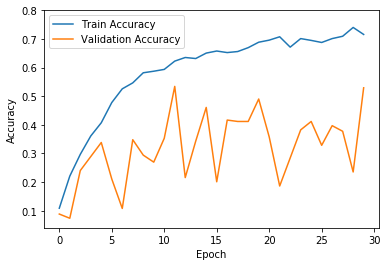

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Validation Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.1,0.2, 0.3,0.4 ,0.5,0.6,0.7,0.8])    
    
plot_history(history)

In [29]:
#Dense Layer model 2, with regularization added
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l1(0.1),activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l1(0.1),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation= tf.nn.softmax))

model.compile(optimizer= optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1105 samples, validate on 204 samples
Epoch 1/30
1105/1105 [==============================] - 24s 22ms/step - loss: 4277.9300 - acc: 0.0679 - val_loss: 1024.9892 - val_acc: 0.0588
Epoch 2/30
1105/1105 [==============================] - 24s 21ms/step - loss: 726.7567 - acc: 0.0552 - val_loss: 600.1784 - val_acc: 0.0588
Epoch 3/30
1105/1105 [==============================] - 26s 23ms/step - loss: 509.7980 - acc: 0.0525 - val_loss: 421.1459 - val_acc: 0.0588
Epoch 4/30
1105/1105 [==============================] - 25s 23ms/step - loss: 351.6577 - acc: 0.0588 - val_loss: 285.1257 - val_acc: 0.0588
Epoch 5/30
1105/1105 [==============================] - 24s 22ms/step - loss: 236.7421 - acc: 0.0588 - val_loss: 192.5004 - val_acc: 0.0588
Epoch 6/30
1105/1105 [==============================] - 24s 22ms/step - loss: 164.8520 - acc: 0.0489 - val_loss: 142.7146 - val_acc: 0.0588
Epoch 7/30
1105/1105 [==============================] - 25s 23ms/step - loss: 135.6146 - acc: 0.0570 - val_loss

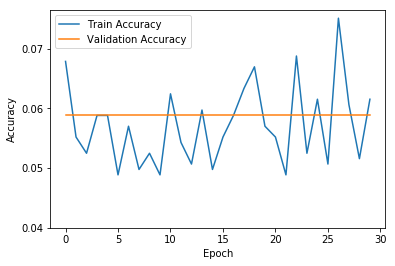

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Validation Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.04,0.05, 0.06,0.07])    
    
plot_history(history)

###### We are getting better results after adding 2 drop out layers and 2 dense layers to Model 1. Hence, we will use below model for prediction. Below model is run 3 times, each time metrics used is different: accuracy, top 5 accuracy, and top 1 accuracy.

In [38]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation= tf.nn.softmax))

model.compile(optimizer= optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1105 samples, validate on 204 samples
Epoch 1/30
1105/1105 [==============================] - 12s 11ms/step - loss: 3.1415 - acc: 0.0824 - val_loss: 2.7434 - val_acc: 0.1225
Epoch 2/30
1105/1105 [==============================] - 13s 12ms/step - loss: 2.7075 - acc: 0.1339 - val_loss: 2.5549 - val_acc: 0.2647
Epoch 3/30
1105/1105 [==============================] - 11s 10ms/step - loss: 2.4456 - acc: 0.2299 - val_loss: 2.3726 - val_acc: 0.2696
Epoch 4/30
1105/1105 [==============================] - 12s 11ms/step - loss: 2.1604 - acc: 0.2968 - val_loss: 2.2517 - val_acc: 0.3971
Epoch 5/30
1105/1105 [==============================] - 13s 11ms/step - loss: 1.9372 - acc: 0.3493 - val_loss: 2.1067 - val_acc: 0.2892
Epoch 6/30
1105/1105 [==============================] - 11s 10ms/step - loss: 1.7091 - acc: 0.4308 - val_loss: 1.7165 - val_acc: 0.5637
Epoch 7/30
1105/1105 [==============================] - 11s 10ms/step - loss: 1.4864 - acc: 0.5041 - val_loss: 1.5103 - val_acc: 0.5931
E

In [54]:
from keras import models
from keras import layers
from keras import optimizers
from keras.metrics import top_k_categorical_accuracy

model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation= tf.nn.softmax))

#Top 5 accuracy used as Metrics 

def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5) 

model.compile(optimizer= optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=[top_5_accuracy])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1105 samples, validate on 204 samples
Epoch 1/30
1105/1105 [==============================] - 17s 16ms/step - loss: 3.2023 - top_5_accuracy: 0.3376 - val_loss: 2.7152 - val_top_5_accuracy: 0.5098
Epoch 2/30
1105/1105 [==============================] - 16s 14ms/step - loss: 2.7673 - top_5_accuracy: 0.4181 - val_loss: 2.5686 - val_top_5_accuracy: 0.6569
Epoch 3/30
1105/1105 [==============================] - 17s 15ms/step - loss: 2.5203 - top_5_accuracy: 0.5620 - val_loss: 2.3855 - val_top_5_accuracy: 0.6814
Epoch 4/30
1105/1105 [==============================] - 15s 13ms/step - loss: 2.2357 - top_5_accuracy: 0.6896 - val_loss: 2.1372 - val_top_5_accuracy: 0.8186
Epoch 5/30
1105/1105 [==============================] - 14s 13ms/step - loss: 2.0006 - top_5_accuracy: 0.7502 - val_loss: 1.9451 - val_top_5_accuracy: 0.7598
Epoch 6/30
1105/1105 [==============================] - 17s 15ms/step - loss: 1.7202 - top_5_accuracy: 0.8163 - val_loss: 1.7142 - val_top_5_accuracy: 0.8382
Epoch

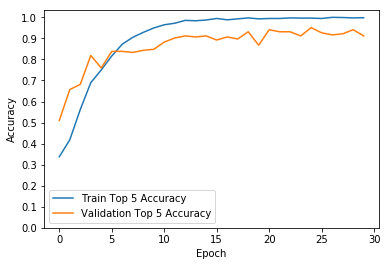

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['top_5_accuracy']),
 label='Train Top 5 Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_top_5_accuracy']),
 label = 'Validation Top 5 Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

In [52]:

from keras import models
from keras import layers
from keras import optimizers
from keras.metrics import top_k_categorical_accuracy

model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation= tf.nn.softmax))

#Top 1 accuracy used as Metrics 

def top_1_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=1) 

model.compile(optimizer= optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=[top_1_categorical_accuracy])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1105 samples, validate on 204 samples
Epoch 1/30
1105/1105 [==============================] - 14s 12ms/step - loss: 3.1093 - top_1_categorical_accuracy: 0.0769 - val_loss: 2.7240 - val_top_1_categorical_accuracy: 0.2255
Epoch 2/30
1105/1105 [==============================] - 12s 11ms/step - loss: 2.7189 - top_1_categorical_accuracy: 0.1394 - val_loss: 2.5490 - val_top_1_categorical_accuracy: 0.2157
Epoch 3/30
1105/1105 [==============================] - 12s 11ms/step - loss: 2.4609 - top_1_categorical_accuracy: 0.2027 - val_loss: 2.3060 - val_top_1_categorical_accuracy: 0.3480
Epoch 4/30
1105/1105 [==============================] - 12s 11ms/step - loss: 2.1738 - top_1_categorical_accuracy: 0.3041 - val_loss: 2.1275 - val_top_1_categorical_accuracy: 0.4167
Epoch 5/30
1105/1105 [==============================] - 12s 11ms/step - loss: 1.9580 - top_1_categorical_accuracy: 0.3575 - val_loss: 1.8453 - val_top_1_categorical_accuracy: 0.5294
Epoch 6/30
1105/1105 [=====================

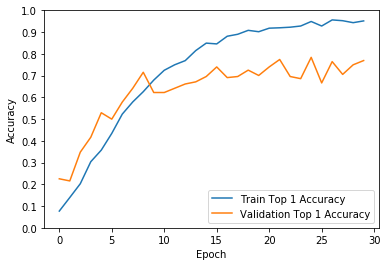

In [53]:


import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['top_1_categorical_accuracy']),
 label='Train Top 1 Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_top_1_categorical_accuracy']),
 label = 'Validation Top 1 Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)